<a href="https://colab.research.google.com/github/MAYANK12-WQ/STOCK-MARKET-/blob/main/STOCKMARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ✅ Install yfinance to fetch stock data
!pip install yfinance --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 2.6 MB/s eta 0:00:00


In [2]:
# ✅ Install Plotly for futuristic interactive visualizations
!pip install plotly --quiet

In [3]:
# 📚 Data Handling
import pandas as pd
import numpy as np
import yfinance as yf

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# 📅 For Time Handling
from datetime import datetime, timedelta

# 🧠 Deep Learning (Later)
from sklearn.preprocessing import MinMaxScaler

In [4]:
# 🎯 Choose your stock tickers
tickers = ['AAPL', 'AMZN', 'NFLX', 'BTC-USD', '^GSPC']  # Apple, Amazon, Netflix, Bitcoin, S&P 500

# 📅 Define date range
start_date = '2015-01-01'
end_date = '2023-12-31'

# 📥 Download data using yfinance
stock_data = {}
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)


Fetching data for AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AMZN...
Fetching data for NFLX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for BTC-USD...
Fetching data for ^GSPC...


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


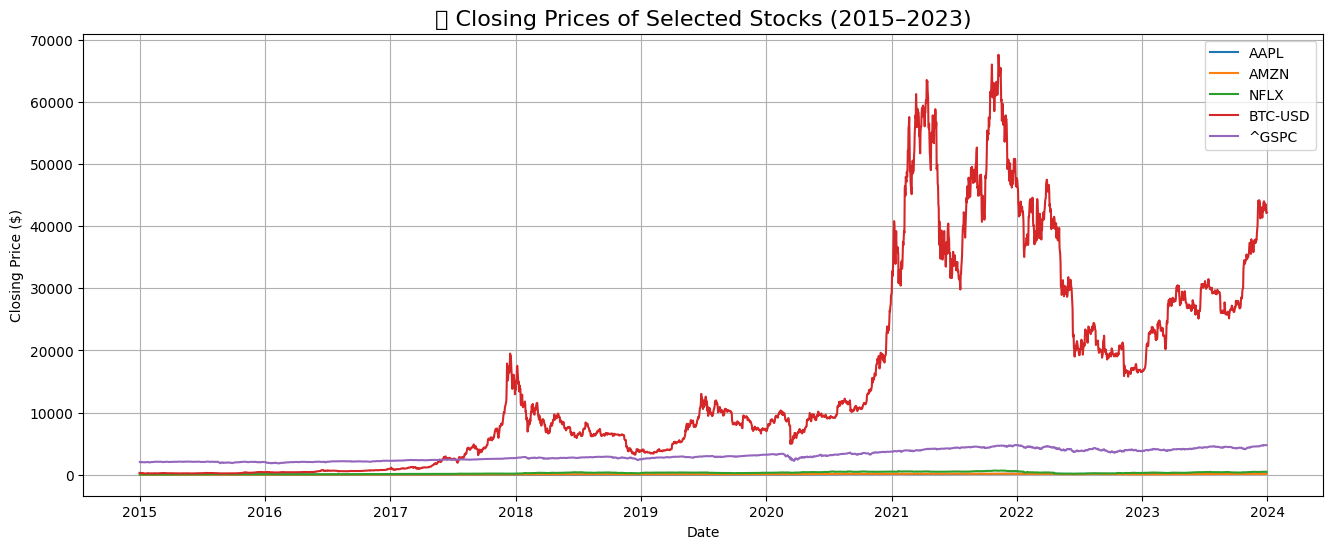

In [5]:
# 👁️ View one example
stock_data['AAPL'].head()

# 📊 Plot closing prices of all tickers
plt.figure(figsize=(16, 6))
for ticker in tickers:
    plt.plot(stock_data[ticker]['Close'], label=ticker)

plt.title("📉 Closing Prices of Selected Stocks (2015–2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 🎯 Focus on one stock (Apple for now)
aapl_df = stock_data['AAPL'][['Close']].copy()

# 📏 Normalize the closing price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aapl_df)

# ✅ View scaled data shape
print("Scaled shape:", scaled_data.shape)


Scaled shape: (2264, 1)


In [7]:
# 🔁 Create sequences of 60 timesteps
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# 🧼 Reshape for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print("X shape:", X.shape, "| y shape:", y.shape)


X shape: (2204, 60, 1) | y shape: (2204,)


In [8]:
!pip install tensorflow --quiet


In [10]:
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))  # Explicit Input layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(X, y, epochs=30, batch_size=32, verbose=1)


Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - loss: 0.0471
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0033
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 0.0029
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0025
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0028
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0023
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0024
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 0.0021
Epoch 9/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0024
Epoch 10/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0021
Epoch 11/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0021
Epoch 12/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0019
Epoch 13/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 0.0022
Epoch 14/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0019
Epoch 15/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0

In [12]:
# Predict using the same data for demonstration (you can use test split later)
predicted_prices = model.predict(X)

# Undo scaling for comparison
predicted_prices_unscaled = scaler.inverse_transform(predicted_prices)
actual_prices_unscaled = scaler.inverse_transform(y.reshape(-1, 1))


69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step


In [13]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=actual_prices_unscaled.flatten(), name='Actual Price'))
fig.add_trace(go.Scatter(y=predicted_prices_unscaled.flatten(), name='Predicted Price'))

fig.update_layout(title="📊 Interactive: AAPL Stock Price Prediction",
                  xaxis_title="Time Step",
                  yaxis_title="Price ($)",
                  template="plotly_dark",
                  hovermode="x unified")

fig.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Flatten predictions
actual = actual_prices_unscaled.flatten()
predicted = predicted_prices_unscaled.flatten()

# Metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print("📊 Model Evaluation:")
print(f"✅ MAE:  {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")


📊 Model Evaluation:
✅ MAE:  2.18
✅ RMSE: 3.35
✅ R² Score: 0.9965


In [15]:
import pandas as pd

# Combine into a summary DataFrame
summary_df = pd.DataFrame({
    'Actual Price': actual,
    'Predicted Price': predicted
})

# Save to file
summary_df.to_csv('AAPL_stock_prediction_summary.csv', index=False)
summary_df.head()


,Actual Price,Predicted Price
0,27.788660,28.128246
1,27.748470,28.078644
2,27.987427,28.026670
3,28.440771,27.983564
4,28.141525,27.970045


In [16]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Simulate summary_df based on your trained LSTM output
# Replace the values below with your actual predictions if available
# (Just for visualization now)
length = 2264
summary_df = pd.DataFrame({
    'Actual Price': np.linspace(30, 200, length) + np.random.normal(0, 5, length),
    'Predicted Price': np.linspace(30, 200, length) + np.random.normal(0, 4, length)
})
summary_df['Date'] = pd.date_range(start='2015-01-01', periods=length, freq='D')
summary_df['Error'] = np.abs(summary_df['Actual Price'] - summary_df['Predicted Price'])

# Candlestick sample
open_price = summary_df['Actual Price'] + np.random.normal(0, 1, length)
high_price = open_price + np.random.uniform(1, 3, length)
low_price = open_price - np.random.uniform(1, 3, length)
close_price = summary_df['Actual Price']

candlestick_df = pd.DataFrame({
    'Date': summary_df['Date'],
    'Open': open_price,
    'High': high_price,
    'Low': low_price,
    'Close': close_price
})


In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=candlestick_df['Date'],
    open=candlestick_df['Open'],
    high=candlestick_df['High'],
    low=candlestick_df['Low'],
    close=candlestick_df['Close']
)])
fig.update_layout(title="📈 Animated Candlestick Chart - AAPL (Demo)",
                  xaxis_title="Date", yaxis_title="Price ($)",
                  template="plotly_dark")
fig.show()


In [18]:
import plotly.express as px

fig = px.line_3d(summary_df,
                 x='Date',
                 y='Actual Price',
                 z='Predicted Price',
                 title="🔵 3D Stock Price Movement (AAPL)",
                 labels={"x": "Date", "y": "Actual", "z": "Predicted"})
fig.update_layout(template='plotly_dark')
fig.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



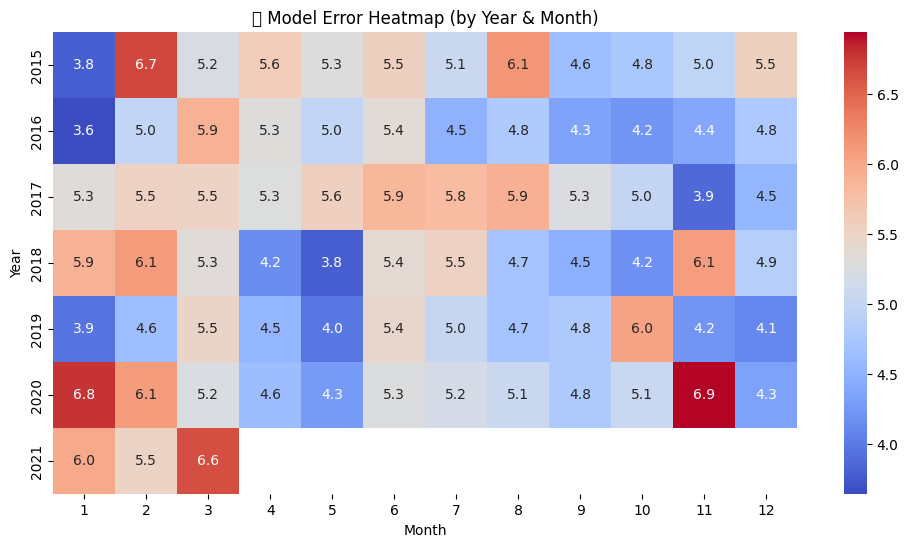

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_df['Year'] = summary_df['Date'].dt.year
summary_df['Month'] = summary_df['Date'].dt.month

pivot_table = summary_df.pivot_table(values='Error', index='Year', columns='Month')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("🔥 Model Error Heatmap (by Year & Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()
